<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Examples: Least squares regression
© ExploreAI Academy

## Learning objectives

By the end of this train, we will:
- Understand what least squares regression is and how we use it to calculate the line of best fit.
- Understand the mathematical techniques used in least squares regression.
- Know how least squares regression is implemented using sci-kit learn.

## Least squares regression

Least squares is a method used in regression analysis to find the best-fitting straight line through a set of data points. It does this by minimising the sum of the squares of the residuals between the observed values and those predicted by the line, i.e.: 
$$Q = \sum_{i=1}^n(y_i-\hat{y}_i)^2$$

The formulae for the slope, \(m\), and the intercept, \(c\), are determined by minimising the equation for the sum of the squared prediction errors:   
$$Q = \sum_{i=1}^n(y_i-(m x_i+c))^2$$

Optimal values for \(m\) and \(c\) are found by differentiating \(Q\) with respect to \(m\) and \(c\), setting both equal to 0, and then solving for \(m\) and \(c\).   
   
The equations for \(m\) and \(c\) are:   
   
$$m = \frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$$   
   
and:   
   
$$c = \bar{y} - m \bar{x}$$

where $\bar{y}$ and $\bar{x}$ are the mean values of \(y\) and \(x\) in our dataset, respectively.

## Examples

### Example 1
   
Let's calculate these values in Python, where \(c\) is the intercept and \(m\) is the slope.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

# Load dataset and set the first column as the index
df = pd.read_csv('https://github.com/Explore-AI/Public-Data/blob/master/exports%20ZAR-USD-data.csv?raw=true', index_col=0)

# Rename columns to 'Y' for the dependent variable and 'X' for the independent variable
df.columns = ['Y', 'X'] # Rename the columns of the DataFrame to 'Y' and 'X'

In [2]:
# Extract values of X and Y as numpy arrays for mathematical operations
X = df.X.values
Y = df.Y.values

# Calculate mean of X and Y
x_bar = np.mean(X)
y_bar = np.mean(Y)

# Calculate the slope (m) of the regression line using the least squares method
m = sum((X - x_bar) * (Y - y_bar)) / sum((X - x_bar) ** 2)

# Calculate the intercept (c) of the regression line
c = y_bar - m * x_bar

# Output the calculated slope and intercept
print("Slope = ", m)
print("Intercept = ", c)

Slope =  0.000113507257658843
Intercept =  1.8448114670426463


Now we'll plot the line we've just calculated the coefficients for.

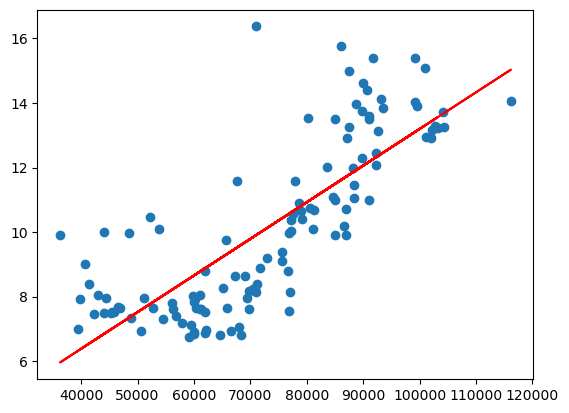

In [3]:
# use the function we created earlier to generate y-values for a given list of x-values, using the calculated slope and intercept
def gen_y(x_list, m, c):
    y_gen = []
    for x_i in x_list:  
        y_i = m*x_i + c 
        y_gen.append(y_i) 
    
    return(y_gen) 

# Generate y-values for the given x-values in the dataset based on the calculated slope and intercept
y_gen = m * df.X + c

# Plot the original data points as a scatter plot
plt.scatter(df.X, df.Y)

# Plot the regression line using the generated y-values
plt.plot(df.X, y_gen, color='red')

plt.show()

In a list called ```errors2```, we'll store the new error values.

In [4]:
errors2 = np.array(y_gen - df.Y) # Calculate the residuals by subtracting the observed Y values from the generated Y values
print(np.round(errors2, 2)) # Print the residuals, rounded to 2 decimal places

[-0.7  -0.49 -0.32  0.43  0.61  0.75  1.17  1.04  0.72 -0.44 -2.14 -2.62
 -3.94 -3.16 -2.69 -2.54 -1.83 -1.32 -1.06 -1.57 -0.51 -0.63 -0.47 -0.49
 -0.82 -0.55  0.87  0.04  0.19  1.14  1.36  0.74  1.47  1.74  1.93  1.82
  0.67  1.25  2.47  1.82  2.01  2.8   2.37  2.5   2.99  1.75  2.46  1.58
  0.62  1.66  2.15  0.82  1.75  1.53  1.59  1.61  0.98  1.06  1.77  0.83
  0.09  1.1   0.93  1.32  1.06  0.58  1.82  0.96  0.59  1.57  1.47  0.23
 -0.12  0.51  0.24  0.1   0.41  0.4   1.01  0.15  1.2   0.8   0.36  0.42
 -2.04 -0.9   0.25 -0.68 -0.11 -0.26 -0.13 -1.19 -1.44 -2.02 -1.69 -3.21
 -6.47 -4.16 -3.14 -2.56 -2.27 -1.77 -2.27 -1.73 -0.91 -2.05 -0.78 -1.38
 -2.59 -1.49  0.39 -1.33  0.21  0.51 -0.76  0.33  0.28 -0.04  0.97  0.44]


Finally, let's plot the errors on a histogram again.

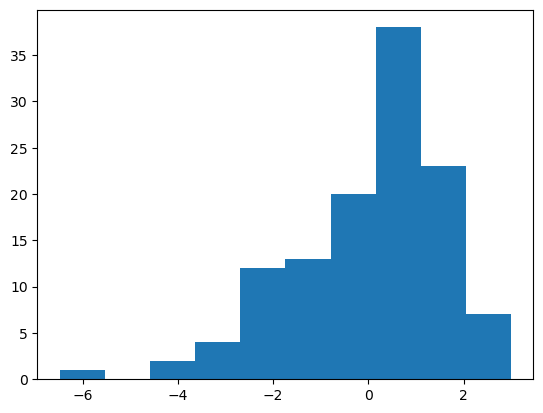

In [5]:
plt.hist(errors2)
plt.show()

In [6]:
# Calculate the residual sum of squares (RSS) by squaring the residuals and summing them up
print("Residual sum of squares:", (errors2 ** 2).sum())

Residual sum of squares: 321.45716655257655


Here we can see our RSS has improved from ~867, in our previous example, down to ~321.  
Furthermore, if we calculate the sum of the errors we find that the value is close to 0.

In [7]:
# Round off the sum of residuals to 11 decimal places to check for numerical stability or precision issues
np.round(errors2.sum(),11)

np.float64(-0.0)

----
Intuitively, this should make sense as it is an indication that the sum of the positive errors is equal to the sum of the negative errors. The line fits in the 'middle' of the data.

## Linear regression in sci-kit learn
   
Now that you understand how least squares linear regression works, let's implement it using sci-kit learn.   

We'll start by loading the LinearRegression library.

In [8]:
# Import the LinearRegression class from scikit-learn's linear_model module
from sklearn.linear_model import LinearRegression

We can take a peak under the hood by using the Python help (`?`) function. This returns the documentation of the required parameters and the attributes of any function or object.   

We're going to need to create a `LinearRegression()` object, so let's first take a look at the documentation for that object:

In [9]:
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup in case of sufficiently large problems, that is if firstly
    `n_targets > 1` and secondly `X` is sparse or if `positive` is set
    to `True`. ``None`` means 1 unless in a
    :obj:`

Let's create a `LinearRegression()` object with all the default parameters.

In [10]:
# Initialise the LinearRegression model
lm = LinearRegression()

At this stage, all we have done is initialise a model of the form: $y = mx+c$. 

But we haven't _fitted the model_, i.e. used the data to calculate the model parameters $a$ and $b$.

### Fitting the linear model

With the object created, we will then need to fit the model to our data. This is done using the `.fit()` function.

In [11]:
lm.fit?

Signature: lm.fit(X, y, sample_weight=None)
Docstring:
Fit linear model.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    Training data.

y : array-like of shape (n_samples,) or (n_samples, n_targets)
    Target values. Will be cast to X's dtype if necessary.

sample_weight : array-like of shape (n_samples,), default=None
    Individual weights for each sample.

    .. versionadded:: 0.17
       parameter *sample_weight* support to LinearRegression.

Returns
-------
self : object
    Fitted Estimator.
File:      c:\users\eugene\anaconda3\lib\site-packages\sklearn\linear_model\_base.py
Type:      method

We can see that the `.fit()` function requires two parameters (`X` and `y`), with an optional third parameter, `sample_weight`.   

The `sample_weight` parameter would be useful in situations where the observations in our data have unequal errors – think weight vs height of university students where some students were weighed with an older analogue scale and others were weighed with a new digital scale.   

We have no reason to believe that any of our data are any more or any less trustworthy, so we'll leave out the optional weights parameter.

In [12]:
# Reshape the X array to a 2D array as required by scikit-learn, converting from pandas Series to numpy array if necessary
X = df.X.values[:, np.newaxis]

In [13]:
# Fit the linear model to the data
lm.fit(X, df.Y)

LinearRegression()

If needed, the model parameters found by the `.fit()` function can be obtained as follows: 

In [14]:
# Extract the slope (coefficient) and intercept from the fitted model
m = lm.coef_[0]
c = lm.intercept_

In [15]:
# Print the slope and intercept
print("Slope:\t\t", m)
print("Intercept:\t", c)

Slope:		 0.00011350725765884303
Intercept:	 1.8448114670426445


### Getting model predictions

To obtain $y$ values from our linear regression model we use the `.predict()` function. Given an array of $x$ values, this function evaluates the fitted model at those $x$ values and returns the corresponding $y$ values. Note that in this case, the `.predict()` function does exactly what the `gen_y()` function we created earlier does. We will explore the concept of prediction in depth in later tutorials.

In [16]:
# Use the fitted model to generate Y values from the X values
gen_y = lm.predict(X)

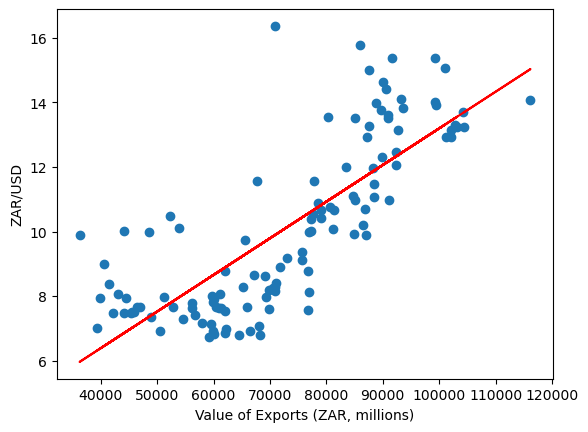

In [17]:
# plot the results
plt.scatter(X, df.Y)  # Plot the original data
plt.plot(X, gen_y, color='red')  # Plot the line connecting the generated y-values

# Label the axes
plt.ylabel("ZAR/USD")
plt.xlabel("Value of Exports (ZAR, millions)")

plt.show()

## Assessing the model accuracy
We can measure the overall error of the fit by calculating the **residual sum of squares**:
   
$$RSS = \sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [18]:
# Calculate and print the residual sum of squares (RSS) for the fitted model
print("Residual sum of squares:", ((gen_y - df.Y) ** 2).sum())

Residual sum of squares: 321.45716655257655


### Sci-kit learn error metrics
Sci-kit learn also has implementations of common error metrics which will make things easier for us to assess the fit of our model.   

In addition to RSS, there are some other metrics we can use:

**Mean squared error (MSE)** measures the average of the squares of the errors between actual and predicted values in a linear regression model. It assesses the fit of the model by quantifying the variance between predicted and observed values, with lower values indicating a better fit.
$$MSE = \frac{RSS}{n}$$   
$$MSE = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$$   
   
**R squared ($R^2$)** quantifies the proportion of the variance in the dependent variable that is predictable from the independent variable(s) in a linear regression. It assesses the strength of the relationship between the model's predictions and the actual data, with values closer to 1 indicating a stronger relationship.
$$R^2 = 1 - \frac{RSS}{TSS}$$   
$$R^2 = 1 - \frac{\sum(y_i-\hat{y}_i)^2}{\sum(y_i-\bar{y})^2}$$

We can compute these metrics using sci-kit learn as follows:

In [19]:
# Import metrics from scikit-learn
from sklearn import metrics

In [20]:
# Calculate and print the mean squared error (MSE) between the observed and predicted Y values
print('MSE:', metrics.mean_squared_error(df.Y, gen_y))

MSE: 2.678809721271471


In [21]:
# Calculate and print the RSS by multiplying the MSE by the number of observations
print("Residual sum of squares:", metrics.mean_squared_error(df.Y, gen_y)*len(X)) 

Residual sum of squares: 321.45716655257655


In [22]:
# Calculate and print the R-squared value, a measure of how well the observed values are replicated by the model
print('R_squared:', metrics.r2_score(df.Y, gen_y))

R_squared: 0.6158417476896207


#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>